In [1]:
import pandas as pd

X_train=pd.read_csv('X_train.csv')
X_test=pd.read_csv('X_test.csv')
y_train=pd.read_csv('y_train.csv')
y_test=pd.read_csv('y_test.csv')

In [2]:
#Ici nous normalisons les données

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

cols=['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity',
      'Perceptions of corruption','Positive affect','Negative affect']

X_train[cols]=scaler.fit_transform(X_train[cols])
X_test[cols]=scaler.transform(X_test[cols])

In [3]:
#Une fois les données normalisés on peut lancer les modélisations de regressions

In [4]:
#REGRESSION LINEAIRE

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [5]:
#Plus les score sont proche de 1 plus les données collent à la droite de regression lineaire
#Ici on est sur du 80% cest qui est assez important on peut supposer que la regression linéaire semble assez approprié

print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.7880753001800223
0.8047390597356207


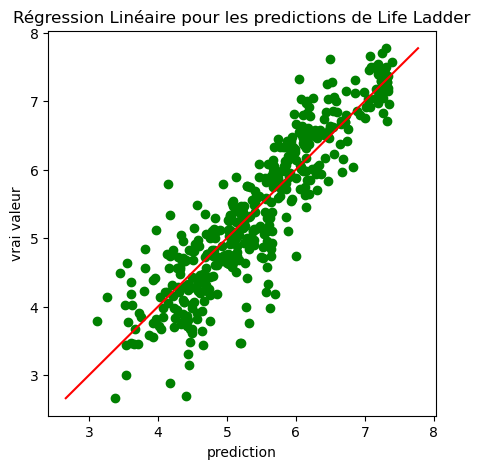

In [7]:
import matplotlib.pyplot as plt

#On fait la prediction que l'on stock dans la variable pred_test
pred_test = regressor.predict(X_test)

#On fait un nuage de point avec les prédictions y du test pour abssice et les vrai valeurs de y_test en ordonnées  
fig = plt.figure(figsize = (5,5))
plt.scatter(pred_test, y_test, c='green')

#on fait une droite de regression avec les vraies valeurs de y_test en absices et les meme valeurs en ordonnées  
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')

#Titres
plt.xlabel("prediction")
plt.ylabel("vrai valeur")
plt.title('Régression Linéaire pour les predictions de Life Ladder')

plt.show()

In [9]:
#ARBRE DE DECISION POUR LA REGRESSION

from sklearn.tree import DecisionTreeRegressor 
  
dtr = DecisionTreeRegressor(random_state=42) 
  
dtr.fit(X_train, y_train)

#On observe un réel overfitting
print(dtr.score(X_train,y_train))
print(dtr.score(X_test,y_test))

1.0
0.7826416940897657


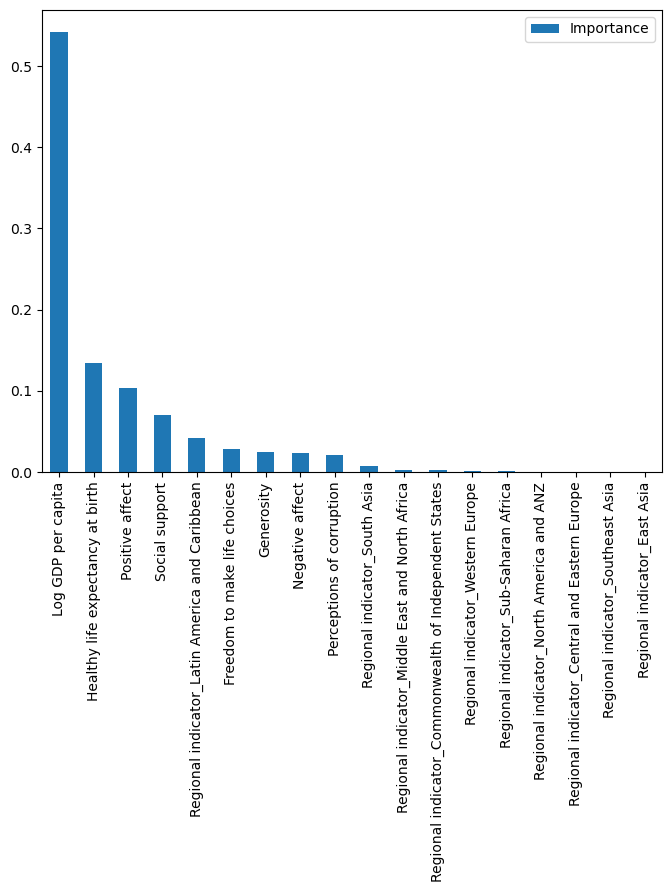

In [10]:
#On affiche l'importance des variables et on remarque que les variables qu'on a vue dans la heatmap ayant une forte crrelatiion
#sont celles qui ont le plus d'importance

import matplotlib.pyplot as plt
%matplotlib inline

importance= pd.DataFrame(dtr.feature_importances_,index=X_train.columns,columns=["Importance"])
importance.sort_values(by='Importance',ascending=False,inplace=True)
importance.plot(kind='bar',figsize=(8,6));

In [11]:
#Essayons de réentrainer le modele en ne gardant que les variables explicatives les plus importantes

from sklearn.tree import DecisionTreeRegressor 

X_train_reduced = X_train[['Log GDP per capita','Social support','Healthy life expectancy at birth','Positive affect']]
X_test_reduced = X_test[['Log GDP per capita','Social support','Healthy life expectancy at birth','Positive affect']]

regressor = DecisionTreeRegressor(random_state=42) 
  
regressor.fit(X_train_reduced , y_train)

print(regressor.score(X_train_reduced,y_train))
print(regressor.score(X_test_reduced,y_test))

#On remarque que cela n'améliore pas le score au contraire

1.0
0.693838174970811


In [12]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor

# Instanciation du modèle
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

C:\Users\user\anaconda4\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [13]:
#Testons le score du modele 

print(rf_model.score(X_train,y_train))
print(rf_model.score(X_test,y_test))

#Pour le moment il s'agit du plus performant pour la regression

0.983888513433794
0.8798667741707552


In [ ]:
#Normalisartion ou standardisation nous obtenons les meme score ! Pourquoi ?